In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
from astropy.io.votable import parse_single_table
# Import the units package as "u", the constants package as "c"
import astropy.units as u
import astropy.constants as c
from astropy.table import QTable
import astropy.coordinates as coord
from matplotlib import colors

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from astroquery.gaia import Gaia

from matplotlib import colors

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
#Querying methods

def read_gaia_vot(filename):
    return QTable(parse_single_table(filename).to_table())

def get_table_gaia_query(myquery):
    return QTable(Gaia.launch_job_async(myquery, dump_to_file = True).get_results())

In [3]:
#Astronomy methods

def luminosityFromMag(magnitude):
    return ((c.L_bol0).value * 10 ** (-0.4 * (magnitude).value))*u.erg

def distance(parallax):
    parallax_arcsec = parallax.to('arcsec').value
    return 1/parallax_arcsec * u.pc

def Magnitude_absolute_from_apparent(mag,dist):
    M = mag - 5*np.log10(dist.to('pc')/u.pc)*u.mag + 5.*u.mag
    return M

def angle_of_star(x,y,z):
    l=np.arctan2(y,x)
    b=np.arctan(z/np.sqrt(x**2+y**2))
    return l,b

In [4]:
#Getting the stars further than 10 parsecs from Proxima Centauri B

myquery = "SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,gaia_source.dec, \
                              gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                              gaia_source.parallax_over_error, gaia_source.phot_g_mean_mag,gaia_source.bp_rp \
           FROM gaiadr2.gaia_source \
           WHERE (gaiadr2.gaia_source.parallax>=10 AND gaiadr2.gaia_source.parallax_over_error>=1)"

r = read_gaia_vot("ProxCentBStars.vot")#get_table_gaia_query(myquery)


r['distance'] = distance(r['parallax'])

r

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,phot_g_mean_mag,bp_rp,distance
,deg,mas,deg,mas,mas,mas,,mag,mag,pc
int64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64
4268956566093383552,286.82895013795695,0.669519113820113,3.068878919405268,0.5723547027638346,10.000007375168247,0.6692301067128285,14.942554,19.40914535522461,nan,99.99992624837192
3680405274634651904,189.18839410229847,1.345836035049771,-4.485016741430886,1.0027026843634803,10.000007988017256,1.5512691246018344,6.44634,20.420467376708984,2.7913665771484375,99.99992011989124
5542991475467702656,126.34253840045612,0.01929890031053926,-35.77303351124245,0.024117580806190607,10.000014708063514,0.028316153216954815,353.15582,11.924257278442383,1.4628915786743164,99.99985291958119
2031252250952531456,295.02987818683874,0.7839207121953283,28.292462705440062,0.9410096751211614,10.000016536887419,1.2941680529154242,7.7269845,19.94524574279785,nan,99.99983463139928
4247659300686406144,303.2469788950952,0.3802633188756341,4.881739000481909,0.3687946510821689,10.000034579341506,0.46504540265895944,21.503351,19.38080406188965,nan,99.99965420778067
3231411455095920256,72.77801741638869,0.0593086441744879,0.5461412910936031,0.04390774375252735,10.000035049166929,0.07440653563624657,134.39726,13.859586715698242,2.05657958984375,99.99964950955916
1462429153039653248,200.90834287775115,0.04354019519596024,30.455280278642267,0.03342775746423084,10.000036583802368,0.06542385149701381,152.85,10.515358924865723,0.999913215637207,99.9996341633147
6035766233137743872,242.19811584736212,0.3426785781343227,-32.6882037161711,0.24326538307143444,10.000036927116145,0.4469612968127237,22.373384,11.729708671569824,1.0707998275756836,99.99963073020214


In [38]:
#Getting the stars between 1.4 and 2 parsecs away and ra between 281 and 310, and dec between 35 and 50

myquery2 = "SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error, \
                               gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                               gaia_source.parallax_over_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp, \
                               gaia_source.radial_velocity,gaia_source.radial_velocity_error, \
                               gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val \
            FROM gaiadr2.gaia_source \
            WHERE (gaiadr2.gaia_source.ra>=5.56014098062107 AND gaiadr2.gaia_source.ra<=350.56014098062107 \
               AND gaiadr2.gaia_source.dec>=-80.587831532659646 AND gaiadr2.gaia_source.dec<=80.587831532659646 \
               AND gaiadr2.gaia_source.parallax>=1 AND gaiadr2.gaia_source.parallax<=18.068624923468156 \
               AND gaiadr2.gaia_source.parallax_over_error>=1)"

p = get_table_gaia_query(myquery2)

p['distance'] = distance(p['parallax'])

p

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,distance
,deg,mas,deg,mas,mas,mas,,mag,mag,km / s,km / s,,K,mag,pc
int64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,object,float32,float32,float64
5867842696999004928,212.72649342427454,0.16654569136256123,-59.05802540463094,0.23051222235236402,1.0000000083512135,0.33775032137096395,2.960767,18.77579689025879,2.7194881439208984,nan,nan,NOT_AVAILABLE,nan,nan,999.9999916487865
4087148470108071552,286.70097523764156,0.6832211927300303,-18.394426011791992,0.5251599912998292,1.0000000188281026,0.6256130905694118,1.5984321,19.778955459594727,1.5227794647216797,nan,nan,NOT_AVAILABLE,nan,nan,999.9999811718976
1817165684726221056,306.2463915188333,0.12586646668012103,21.605585677368936,0.1399232199222302,1.0000000341914919,0.16816424902644325,5.9465675,17.437915802001953,1.7741317749023438,nan,nan,NOT_AVAILABLE,nan,nan,999.9999658085093
5312206389985020160,143.46501093802237,0.7195260848050724,-52.495580723300016,0.7715394612829777,1.0000000515892649,0.8540936566925174,1.1708318,20.601932525634766,1.5536975860595703,nan,nan,NOT_AVAILABLE,nan,nan,999.9999484107378
6039135995740281728,243.56294629266733,0.6866554663993056,-28.671862909133143,0.3101998705718258,1.0000000522226185,0.8448436209150945,1.1836511,20.005159378051758,1.1123428344726562,nan,nan,NOT_AVAILABLE,nan,nan,999.9999477773844
4051717807494936704,277.5609064599959,0.07625275866836724,-27.47991797294544,0.0735764418621387,1.0000000523939314,0.09362269885636208,10.681171,15.776820182800293,1.3340778350830078,nan,nan,NOT_AVAILABLE,4572.52490234375,nan,999.9999476060713
6021361595705122816,245.13450731900335,0.18716159418504832,-37.934294235844185,0.135557127194438,1.0000000524828971,0.21644258641873923,4.620163,18.296247482299805,2.1371383666992188,nan,nan,NOT_AVAILABLE,nan,nan,999.9999475171056
5909913280341892992,264.1261823364954,0.1906541510608805,-64.01920341266977,0.188885470120395,1.0000000532350783,0.25829038486476885,3.8716116,18.99789047241211,1.7328987121582031,nan,nan,NOT_AVAILABLE,nan,nan,999.9999467649246


In [22]:
#Converting the ra, dec, and distance into Sky Coordinates, and then into Galactocentric Coordinates
KeplerSky=coord.SkyCoord(ra=r['ra'],dec=r['dec'],distance=r['distance'])
KeplerGC=KeplerSky.galactocentric
KeplerGC

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8220.66213859,  6.08005342e+01,  23.03131246),
     (-8276.59143639, -4.73876141e+01, 111.90283439),
     (-8326.10804401, -9.64945299e+01,  29.20256429), ...,
     (-8299.37034114,  5.95560953e-02,  26.92901924),
     (-8299.42076623,  6.51441958e-02,  26.95323048),
     (-8299.4185165 ,  3.46835404e-02,  26.96247052)]>

In [23]:
#Finding Sky Coordinates of Kepler 452
Kepler452=coord.SkyCoord(ra=293.2609013066638*u.degree,dec=44.86886564417808*u.degree,distance=distance(1.3398916644968708*u.mas))

In [24]:
#Converting Kepler 4452 Sky Coordinates into Galactocentric Coordinates
Kepler452G=Kepler452.galactocentric

In [25]:
#Finding the distances between the x,y,z of the stars in our query and Kepler 452's x,y,z
x=(KeplerGC.x-Kepler452G.x)
y=(KeplerGC.y-Kepler452G.y)
z=(KeplerGC.z-Kepler452G.z)

In [26]:
#Using our method angle_of_star to solve for L,B in Galactic
L,B=angle_of_star(x,y,z)

In [36]:
#Finding the apparent magnitudes of the stars from the neighboring stars
r['Mg'] = Magnitude_absolute_from_apparent(r['phot_g_mean_mag'], r['distance'])
r['otherDistance'] = np.sqrt(x.value**2+y.value**2+z.value**2)*u.pc
r['m'] = (r['Mg'].value - 5 + 5*np.log10(r['otherDistance'].value))*u.mag

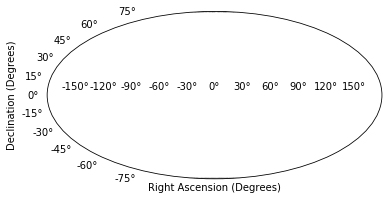

In [37]:
#Plotting the Right Ascension and Declination found previously and adding the new apparent magnitude to get a nice graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.subplot(111, projection = "mollweide")

plt.scatter((L.to('degree')).value, (B.to('degree').value), s = 1, c = (r['m']), alpha = 0.1, cmap = "gist_gray_r")
ax.set_facecolor("Black")

plt.xlabel("Right Ascension (Degrees)")
plt.ylabel("Declination (Degrees)")

#plt.xlim(-180,0)
#plt.ylim(-75,75)
plt.show()



In [ ]:
#Repeating all steps for Proxima Centauri B
ProxSky=coord.SkyCoord(ra=r['ra'],dec=r['dec'],distance=r['distance'])
ProxGC=ProxSky.galactocentric

In [ ]:
ProxCent=coord.SkyCoord(ra=293.2609013066638*u.degree,dec=44.86886564417808*u.degree,distance=distance(1.3398916644968708*u.mas))

In [29]:
ProxCentG=ProxCent.galactocentric

In [30]:
x1=(ProxGC.x-ProxCentG.x)
y1=(ProxGC.y-ProxCentG.y)
z1=(ProxGC.z-ProxCentG.z)

In [31]:
L1,B1=angle_of_star(x1,y1,z1)

In [32]:
r['Mg'] = Magnitude_absolute_from_apparent(r['phot_g_mean_mag'], r['distance'])

r['m'] = (r['Mg'].value - 5 + 5*np.log10(np.sqrt(x1.value**2+y1.value**2+z1.value**2)))*u.mag

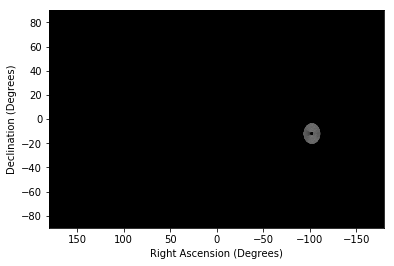

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#plt.subplot(111, projection = "mollweide") c = (r['m']), alpha = 0.1, cmap = "gray_r"

plt.scatter((L.to('degree')).value, (B.to('degree').value), s = 1, c = (r['m']), alpha = 0.1, cmap = "gray_r")
ax.set_facecolor("Black")

plt.xlabel("Right Ascension (Degrees)")
plt.ylabel("Declination (Degrees)")

plt.xlim(180,-180)
plt.ylim(-90,90)
plt.show()

In [34]:
len(p)

1000000

In [35]:
len(r)

700055